In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('../Data/Final_new_phase1.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,1,2,2_text,3,4,5,6,7,7_address,7_state,...,62.1,62.2,62.3,63.1,63.2,63.3,63_text,64,65,66
0,County Jail,Detained,NaN,2020-09-30,awaiting trial for probation violation,38,26,2127.0,and,NaN,...,no,no,yes,NaN,NaN,out-of-school,fighting girls and being mean,"St. Margarets elementary and middle, Monsignor...","No, I was a straight A student until my dad di...",With more drug programs for us to sign up for ...
1,County Jail,Sentenced,2 9 months run concurrent,2020-07-21,Both are possession of Class A + B,22,18,3064.0,Nashua NH,NaN,...,no,no,yes,NaN,"in-school, out-of-school","in-school, out-of-school","talking back, skipping, food fight, smoking, w...",Amherst NH elementary (forget the name) 2 elem...,I was a phenomenal student that had so much po...,Thank you guys very much for doing this. I thi...
2,County Jail,Detained,NaN,2020-05-02,"4th OUI, OUI bodily injury",33,23 1/2,2130.0,Jamaica Plain MA,NaN,...,no,no,no,NaN,NaN,NaN,N/A (Good luck with school),"Lafayette Elementary School, Everett, MA; Marg...","I never went to high school, I got my GED",Thank you. Happy Holidays.
3,State Prison,Detained,NaN,2020-07-21,"Domestic, reckless endangerment, intimidation ...",34,34,2188.0,NaN,NaN,...,no,no,no,NaN,NaN,"in-school, out-of-school","I skipped class a bunch of times, I beat up an...","William Seach School, Abigail Adams School, We...",NaN,NaN
4,County Jail,Sentenced,2 years,2019-11-15,indecent A&B,28,27,2150.0,NaN,NaN,...,no,no,yes,NaN,NaN,out-of-school,skipping school,"Chelsea Public School K-12, and Youthbuild jus...",Youthbuild was the best thing that ever happen...,"Invest in Youhtbuild Programs, they change lives"


In [2]:
race_group =df.groupby(['8'])
black_count = df[df['8'] == "Black/African American"]
latinx_count = df[df['8'] == "Latinx"]
white_count = df[df['8'] == "White"]

Question: How did the juvenile protection program perform (i.e: keep the youth from the pipeline before age 18), based on home safety, juvenile justice involvement, and schooling?

In [3]:
feature_cols = ['29', '45', '46', '48', '53', '54', '57.3', '61.3', '62.3']

#29 Home removal
#45 positive experience with the police during adolescence
#46 negative experience with the police during adolescence
#48 spend time in youth correctional facility
#53 relationship with lawyers in the juvenile justice system
#54 juvenile convictions
#55 feel treated fairly in the juvenile justice system
#57.3 did they go to high schools
#61.3 how often they got suspended
#62.3 did they get expelled from high schools


df['29'].fillna("No", inplace=True)
df['45'].fillna(0, inplace=True)
df['46'].fillna(0, inplace=True)
df['48'].fillna("No", inplace=True)
df['53'].fillna("Please explain:", inplace=True)
#"please explain" means no need laywer
df['54'].fillna("No", inplace=True)
df['55'].fillna("Explain:", inplace=True)
df['57.3'].fillna("none", inplace=True)
df['61.3'].fillna("never", inplace=True)
df['62.3'].fillna("no", inplace=True)
df['47'].fillna(0,inplace=True)
#print(df[feature_cols].isnull().sum())

In [4]:
##data cleaning
df['29'].replace("Yes", 1, inplace = True)
df['29'].replace("Yes,No", 0, inplace = True)
df['29'].replace("No", 0, inplace = True)

df['48'].replace("Yes", 1, inplace = True)
df['48'].replace("Yes,No", 0, inplace = True)
df['48'].replace("No", 0, inplace = True)

df['53'].replace(["Mixed,Please explain:","Mixed"], 2, inplace = True)
df['53'].replace(["Mostly negative,Please explain:","Mostly negative"], 0, inplace = True)
df['53'].replace(["Mostly positive,Please explain:","Mostly positive","Mostly positive,Mixed"], 1, inplace = True)
df['53'].replace("Mostly positive,Mixed", 1, inplace = True)
df['53'].replace("Please explain:", 2, inplace = True)

df['54'].replace("Yes", 1, inplace = True)
df['54'].replace("No", 0, inplace = True)
df['54'].replace("Yes,No", 0, inplace = True)

df['55'].replace(["Yes,Explain:","Yes"], 1, inplace = True)
df['55'].replace(["No,Explain:","No"], 0, inplace = True)
df['55'].replace(["Yes,No,Explain:", "Explain:", "Yes,No"], 2, inplace = True)

df['57.3'].replace(["none","Never made it to high school","Never went","None" ], 0, inplace = True)
df['57.3'].replace(["2", "More than two", "One", "One, Two", "Two", "more than two", "one", "two"], 1, inplace = True)

#suspended more than once
df['61.3'].replace([" A few times","A few times","A few timesNo","Often","Yes","a few times","often"],1 , inplace = True)
#suspended less than once
df['61.3'].replace(["Never","Once","never","once","never "],0, inplace = True)

df['62.3'].replace(["Yes","Yes, I fought to get back in","yes"],1, inplace = True)
df['62.3'].replace(["NO","No","almost","no"],0, inplace = True)

df['47'].replace("Yes,No",1,inplace = True)
df['47'].replace("Yes", 1,inplace=True)
df['47'].replace("No", 0,inplace=True)

In [5]:
##prepare tree
X = df[feature_cols]
y = df['47']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier(min_samples_split=0.009, max_depth=20)

# train Decision Tree Classifer
model = clf.fit(X_train, y_train)

# record the training accuracy
y_train_predictions = model.predict(X_train)

# model train accuracy 
print("Decision Tree Training Accuracy is: ", accuracy_score(y_train, y_train_predictions))

# predict the response for test dataset
y_test_predictions = model.predict(X_test)

# model test accuracy (i.e. how often is the classifier correct)
print("Decision Tree Testing Accuracy is: ", accuracy_score(y_test, y_test_predictions))

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(150, 100))
_ = plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=['Not Jailed', 'Jailed'], # survived or not
                   filled=True)

#fig.savefig("decision_tree_d.png")

Decision Tree Training Accuracy is:  0.8820754716981132
Decision Tree Testing Accuracy is:  0.7924528301886793


Feature: 0, Score: 0.05653
Feature: 1, Score: 0.02726
Feature: 2, Score: 0.09357
Feature: 3, Score: 0.11833
Feature: 4, Score: 0.18858
Feature: 5, Score: 0.36382
Feature: 6, Score: 0.03554
Feature: 7, Score: 0.04523
Feature: 8, Score: 0.07114


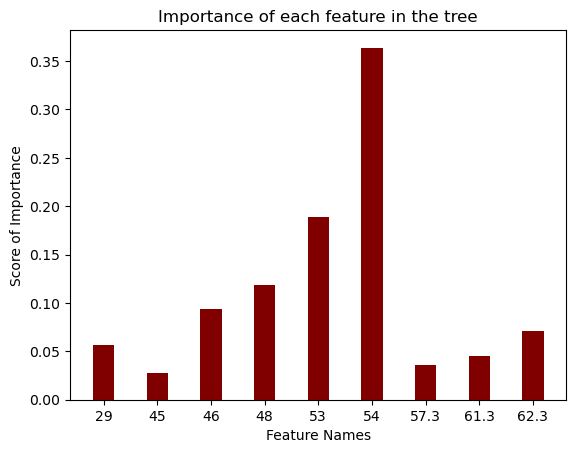

In [6]:
importance = model.feature_importances_
feature_name = model.feature_names_in_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()
plt.bar(feature_name, importance, color ='maroon',
        width = 0.4)
plt.xlabel("Feature Names")
plt.ylabel("Score of Importance")
plt.title("Importance of each feature in the tree")
plt.show()

In [7]:
import statsmodels.api as sm
model_ = sm.OLS(y_train, X_train).fit()

y_train_predictions = model_.predict(X_train)

# model train accuracy 
print("OLS Training Accuracy is: ", accuracy_score(y_train, round(y_train_predictions)))

# predict the response for test dataset
y_test_predictions = model_.predict(X_test)

# model test accuracy (i.e. how often is the classifier correct)
print("OLS Testing Accuracy is: ", accuracy_score(y_test, round(y_test_predictions)))
#view model summary
print(model_.summary())

OLS Training Accuracy is:  0.7594339622641509
OLS Testing Accuracy is:  0.9245283018867925
                                 OLS Regression Results                                
Dep. Variable:                     47   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              49.22
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                    2.50e-46
Time:                        10:26:48   Log-Likelihood:                         -104.64
No. Observations:                 212   AIC:                                      227.3
Df Residuals:                     203   BIC:                                      257.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std 